Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

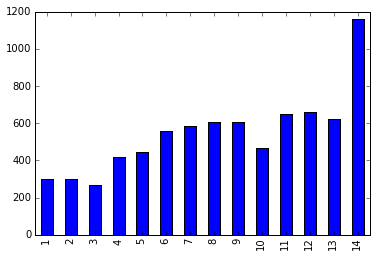

In [2]:
resp.totincr.value_counts().sort_index().plot(kind='bar')

In [3]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)

Display the histogram.

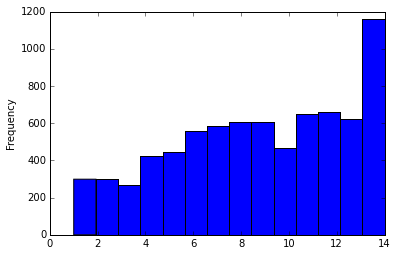

In [5]:
resp.totincr.plot(kind='hist',bins=14)

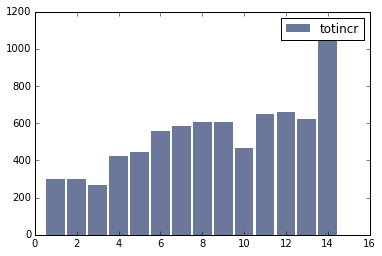

In [6]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

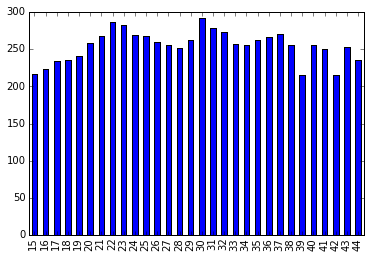

In [7]:
resp.age_r.value_counts().sort_index().plot(kind='bar')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

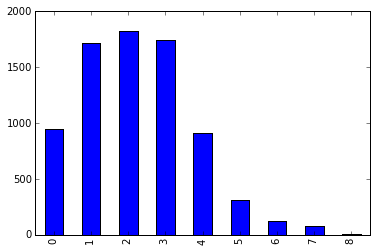

In [8]:
resp.numfmhh.value_counts().sort_index().plot(kind='bar')

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

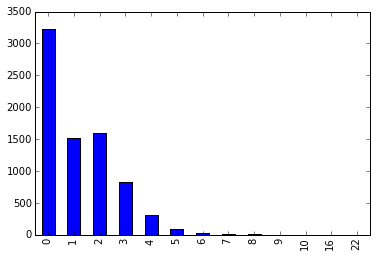

In [9]:
resp.parity.value_counts().sort_index().plot(kind='bar')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [10]:
resp.parity.value_counts().sort_index().tail(5)

8     8
9     2
10    3
16    1
22    1
Name: parity, dtype: int64

Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

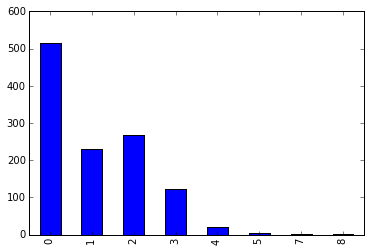

In [11]:
resp[resp.totincr == 14].parity.value_counts().\
sort_index().plot(kind='bar')

Find the largest parities for high income respondents.

In [12]:
resp[resp.totincr == 14].\
parity.value_counts().sort_index().tail(5)

3    123
4     19
5      5
7      1
8      1
Name: parity, dtype: int64

Compare the mean <tt>parity</tt> for high income respondents and others.

In [13]:
resp[resp.totincr == 14].parity.mean()

1.0758620689655172

In [14]:
resp[resp.totincr != 14].parity.mean()

1.2495758136665125

Investigate any other variables that look interesting.

In [16]:
def CohenEffectSize(group1, group2):
    import math
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1*var1 + n2*var2)/(n1+n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [17]:
drichparity = CohenEffectSize(resp[resp.totincr != 14].parity, resp[resp.totincr == 14].parity)

In [18]:
drichparity

0.1251185531466061